# COMP9517: Computer Vision Lab 2

## Objective
This lab revisits important concepts covered in the Week 3 lectures and aims to make you familiar with implementing specific algorithms using OpenCV and Python.

### Task 1: Compute SIFT Features
1. Extract the SIFT features with default parameters and show the keypoints on the pictures.
2. Reduce the number of keypoints to include only the ~20 most prominent ones for better visualization.

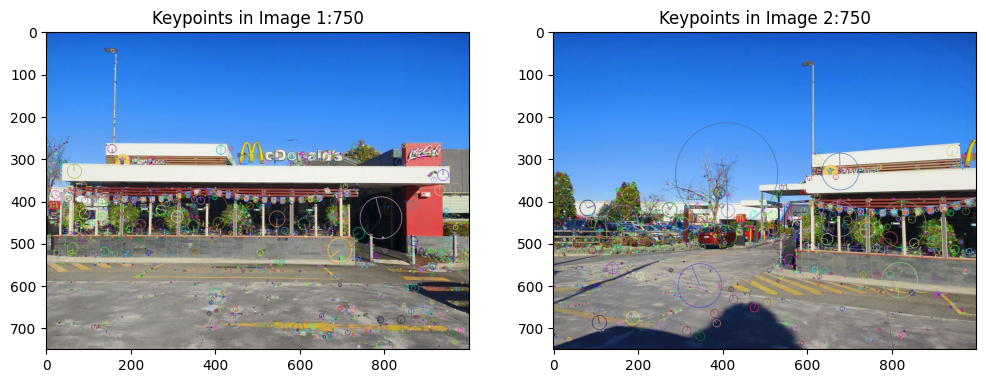

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the images
img1 = cv2.imread('IMG_20240619_141449.jpg')
img2 = cv2.imread('IMG_20240619_141459.jpg')

# Convert to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect SIFT features and compute descriptors
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# Draw keypoints
img1_kp = cv2.drawKeypoints(img1, kp1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_kp = cv2.drawKeypoints(img2, kp2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display images with keypoints
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(cv2.cvtColor(img1_kp, cv2.COLOR_BGR2RGB)), plt.title(f'Keypoints in Image 1:{len(img1_kp)}')
plt.subplot(122), plt.imshow(cv2.cvtColor(img2_kp, cv2.COLOR_BGR2RGB)), plt.title(f'Keypoints in Image 2:{len(img2_kp)}')
plt.show()

#### Reduce Keypoints to ~20 Most Prominent Ones

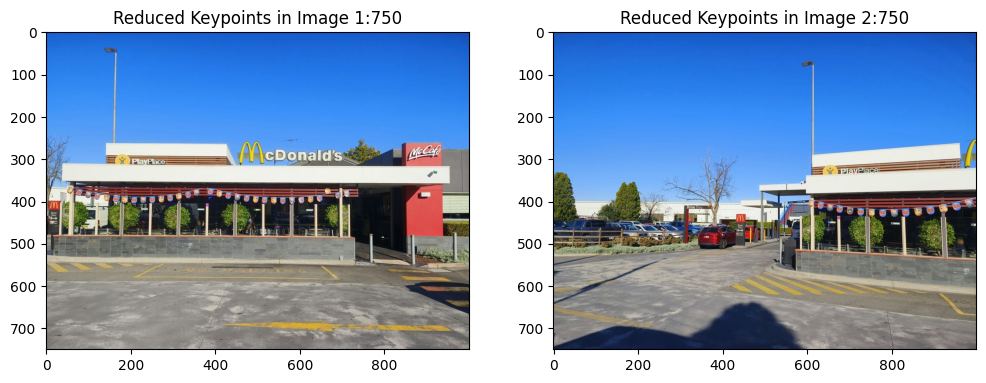

In [3]:
# Reduce number of keypoints
sift = cv2.SIFT_create(nfeatures=20)
kp1_reduced, des1_reduced = sift.detectAndCompute(gray1, None)
kp2_reduced, des2_reduced = sift.detectAndCompute(gray2, None)

# Draw reduced keypoints
img1_kp_reduced = cv2.drawKeypoints(img1, kp1_reduced, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_kp_reduced = cv2.drawKeypoints(img2, kp2_reduced, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display images with reduced keypoints
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(cv2.cvtColor(img1_kp_reduced, cv2.COLOR_BGR2RGB)), plt.title(f'Reduced Keypoints in Image 1:{len(img1_kp_reduced)}')
plt.subplot(122), plt.imshow(cv2.cvtColor(img2_kp_reduced, cv2.COLOR_BGR2RGB)), plt.title(f'Reduced Keypoints in Image 2:{len(img2_kp_reduced)}')
plt.show()

### Task 2: Processed Versions of Images
1. Scale images by 120%.
2. Rotate images by 60 degrees clockwise.
3. Add salt and pepper noise to the images.
4. Extract and display SIFT features for each processed image.
5. Discuss the robustness of SIFT features to each type of image processing.

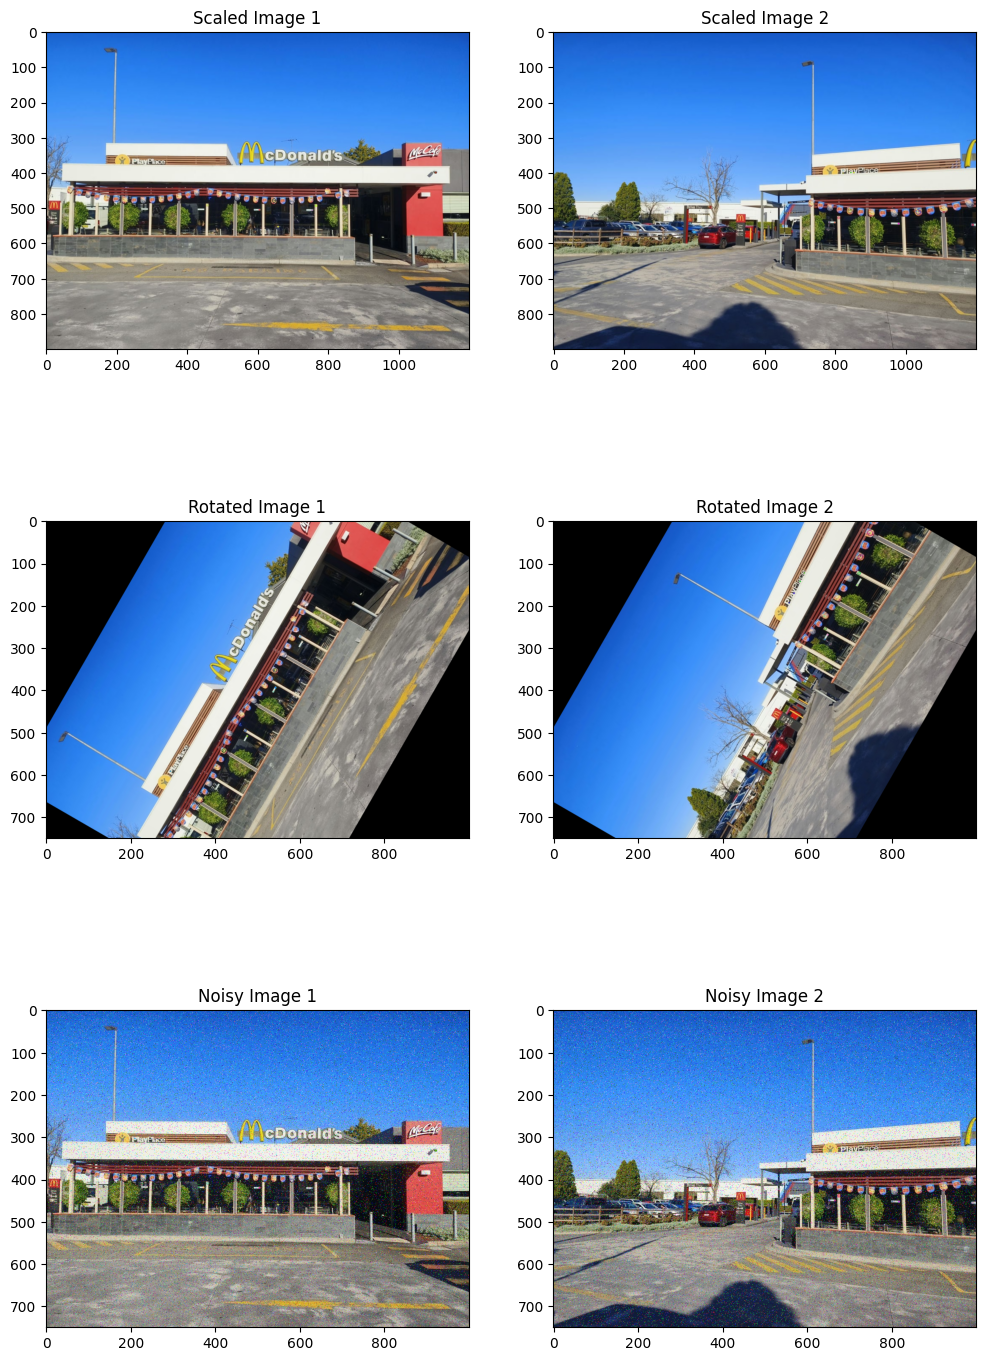

In [4]:
from skimage.util import random_noise

# Scale images
scale_factor = 1.2
img1_scaled = cv2.resize(img1, None, fx=scale_factor, fy=scale_factor)
img2_scaled = cv2.resize(img2, None, fx=scale_factor, fy=scale_factor)

# Rotate images
angle = 60
h, w = img1.shape[:2]
M = cv2.getRotationMatrix2D((w/2, h/2), angle, 1)
img1_rotated = cv2.warpAffine(img1, M, (w, h))
img2_rotated = cv2.warpAffine(img2, M, (w, h))

# Add salt and pepper noise
img1_noisy = (random_noise(img1, mode='s&p') * 255).astype(np.uint8)
img2_noisy = (random_noise(img2, mode='s&p') * 255).astype(np.uint8)

# Function to detect and draw keypoints
def detect_and_draw_keypoints(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kp, des = sift.detectAndCompute(gray, None)
    img_kp = cv2.drawKeypoints(img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    return img_kp

# Detect and draw keypoints for processed images
img1_scaled_kp = detect_and_draw_keypoints(img1_scaled)
img2_scaled_kp = detect_and_draw_keypoints(img2_scaled)
img1_rotated_kp = detect_and_draw_keypoints(img1_rotated)
img2_rotated_kp = detect_and_draw_keypoints(img2_rotated)
img1_noisy_kp = detect_and_draw_keypoints(img1_noisy)
img2_noisy_kp = detect_and_draw_keypoints(img2_noisy)

# Display keypoints for processed images
plt.figure(figsize=(12, 18))
plt.subplot(321), plt.imshow(cv2.cvtColor(img1_scaled_kp, cv2.COLOR_BGR2RGB)), plt.title('Scaled Image 1')
plt.subplot(322), plt.imshow(cv2.cvtColor(img2_scaled_kp, cv2.COLOR_BGR2RGB)), plt.title('Scaled Image 2')
plt.subplot(323), plt.imshow(cv2.cvtColor(img1_rotated_kp, cv2.COLOR_BGR2RGB)), plt.title('Rotated Image 1')
plt.subplot(324), plt.imshow(cv2.cvtColor(img2_rotated_kp, cv2.COLOR_BGR2RGB)), plt.title('Rotated Image 2')
plt.subplot(325), plt.imshow(cv2.cvtColor(img1_noisy_kp, cv2.COLOR_BGR2RGB)), plt.title('Noisy Image 1')
plt.subplot(326), plt.imshow(cv2.cvtColor(img2_noisy_kp, cv2.COLOR_BGR2RGB)), plt.title('Noisy Image 2')
plt.show()

### Task 3: Match and Stitch Images
1. Match keypoints between the two images.
2. Use RANSAC to estimate the transformation between images.
3. Warp and stitch the images together.

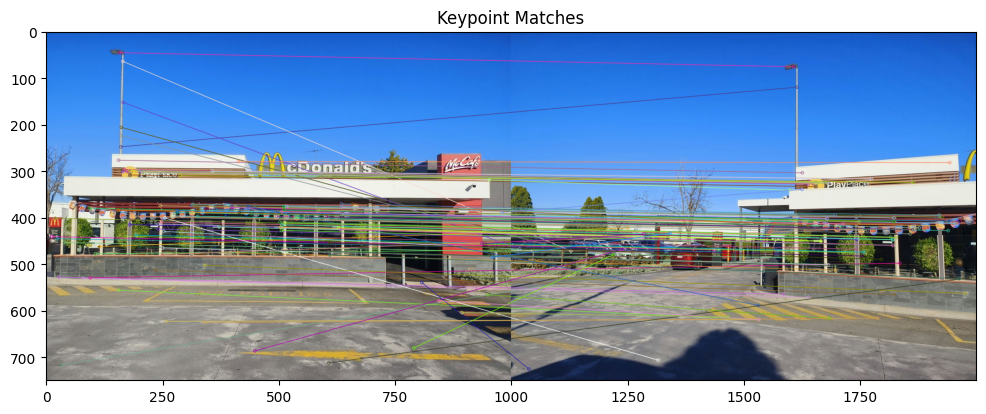

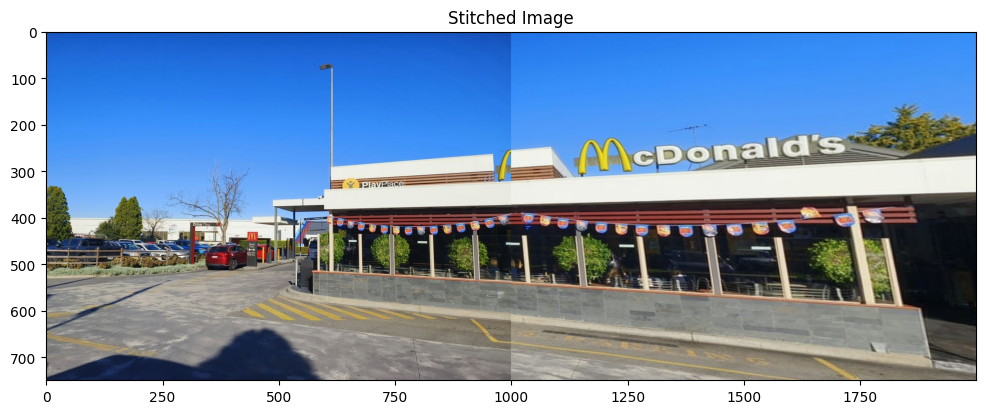

In [10]:
# Brute Force Matcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw matches
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display matches
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.title('Keypoint Matches')
plt.show()

# Extract location of good matches
src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 2)

# Find homography
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
matches_mask = mask.ravel().tolist()

# Warp images
h, w, _ = img1.shape
img1_warped = cv2.warpPerspective(img1, M, (w + img2.shape[1], h))

# 拼接图像
stitched_img = img1_warped.copy()
stitched_img[0:img2.shape[0], 0:img2.shape[1]] = img2

# Display stitched image
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(stitched_img, cv2.COLOR_BGR2RGB))
plt.title('Stitched Image')
plt.show()

### Conclusion
- Discuss the robustness of SIFT features to scaling, rotation, and noise.
- Summarize the key findings from the image processing and stitching tasks.